In [29]:
import scipy as sp
import scipy.linalg as linalg
from sklearn.cluster import KMeans
import spectral_clustering_helper as scplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
########################
#       Setup etc      #
########################

k=10

#Functions 
def similarity(x,y):
    #return 1000/(linalg.norm((x-y),2))
    return linalg.norm(np.multiply(x,y), ord=0)
data = pd.read_csv("DataSets/MINST.txt", header=None, delim_whitespace=True)
x_list = []
for i, row in data.iterrows():
    x_list.append(np.array(row))

##x_list = sp.concatenate([sp.random.normal(c,dist_sd,dist_cnt) for c in dist_centers])

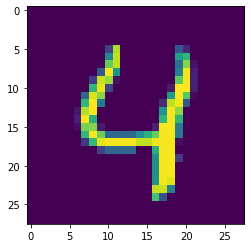

67.0


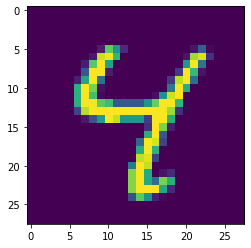

In [118]:
v1 = x_list[13]
distdict = {}
for i in range(1,len(x_list)):
    v2 = x_list[i]
    dist = linalg.norm((v1-v2),2)
    if dist not in distdict.keys():
        distdict[dist] = [i]
    else:
        distdict[dist].append(i)

plt.imshow(x_list[4].reshape((28, 28)))
plt.show()
plt.imshow(x_list[6].reshape((28, 28)))
print(similarity(x_list[4],x_list[6]))

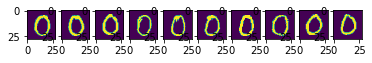

In [119]:
closest = []
sortedist =  sorted (distdict.keys())
i = -1
while len(closest) < 10:
    i += 1
    closest += distdict[sortedist[i]]
closest

fig, ax = plt.subplots(1,10)
idx = 0
for i in closest:
    ax[idx].imshow(x_list[i].reshape((28, 28)))
    idx+=1
plt.show()

In [120]:
L_full,W_full,D_full = scplot.createMatrices(x_list[1:100], similarity)

L=L_full
W=W_full
D=D_full
#Plot L,D and W
#scplot.plot_matrix(W_full, "W - Weight Matrix")
#scplot.plot_matrix(D_full,"D - Degree Matrix")
#scplot.plot_matrix(L_full,"L - Graph Laplacian (L=D-W)")

In [100]:


L,W,D,cutoff = scplot.convertToEpsilonNeighborhoodGraphByPercentile(W_full, .96)

print("Cutoff",cutoff)
#Plot L,D and W
#scplot.plot_matrix(W, "W - Weight Matrix")
#scplot.plot_matrix(D,"D - Degree Matrix")
#scplot.plot_matrix(L,"L - Graph Laplacian (L=D-W)")

Cutoff:  3963805.48
Cutoff 3963805.48


In [121]:
e_val,e_vec = linalg.eigh(L)
zeroCount = 0
for e in e_val:
    if(abs(e)<1e-12):
        zeroCount +=1
print("multiplicity of zero eigenvalue",zeroCount)
k=zeroCount

multiplicity of zero eigenvalue 0


In [122]:
########################
#       Clustering     #
########################

# eigen values and clustering
e_val,e_vec = linalg.eigh(L)
km10 = KMeans(n_clusters=10).fit(e_vec[:,0:10])
#km = KMeans(n_clusters=k).fit(e_vec[:,0:k+4])
#km = KMeans(n_clusters=k).fit(e_vec)

#print("Output of KMeans Clustering")
#display(km.cluster_centers_)
#display(km.labels_)

99
[0 2 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 8 0 0 0 0 0 0
 0 0 1 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 0 =============

90


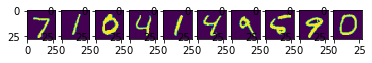

 2 =============



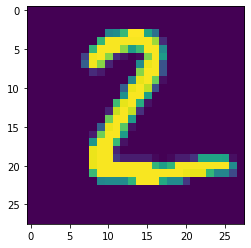

 9 =============



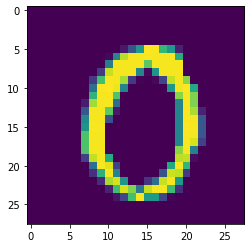

 5 =============



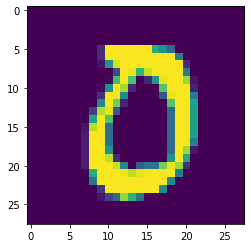

 8 =============



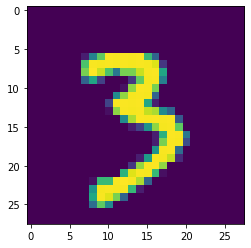

 1 =============



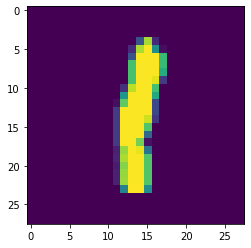

 7 =============



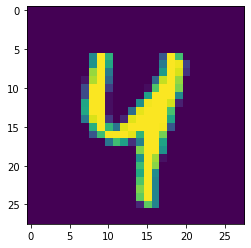

 4 =============



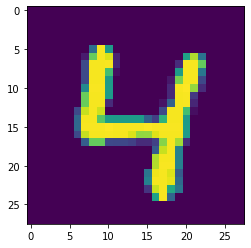

 6 =============



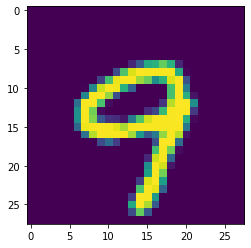

 3 =============



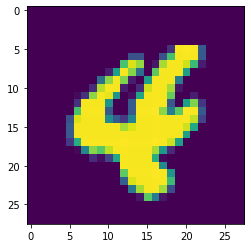

In [123]:
imdict = {}
i = -1;
for l in km10.labels_:
    i+=1
    if l not in imdict.keys():
        imdict[l] = [x_list[i]]
    else:
        imdict[l].append(x_list[i])
    
print(len(km10.labels_))
print(km10.labels_)

for k in imdict.keys():
    print('==============\n',k,'=============\n')
    if len(imdict[k]) == 1:
        plt.imshow(imdict[k][0].reshape((28, 28)))
    else:
        fig, ax = plt.subplots(1, min(10, len(imdict[k])))
        print(len(imdict[k]))
        for a in range(0,len(ax)):
            ax[a].imshow(imdict[k][a].reshape((28, 28)))
            a+=1
    plt.show()
    plt.close()

NameError: name 'x' is not defined

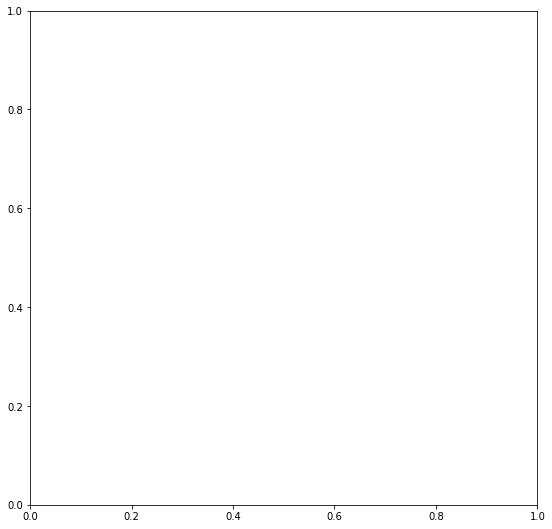

In [70]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

figure = plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.scatter(x,y,c=km5.labels_, cmap='tab10')
plt.title("Clustering output with 5 clusters")

plt.subplot(2,2,2)
plt.scatter(x,y,c=km8.labels_, cmap='tab10')
plt.title("Clustering output with 8 clusters")

plt.subplot(2,2,3)
plt.scatter(x,y,c=km9.labels_, cmap='tab10')
plt.title("Clustering output with 9 clusters")

plt.subplot(2,2,4)
plt.scatter(x,y,c=km10.labels_, cmap='tab10')
plt.title("Clustering output with 10 clusters")
plt.show()
figure.savefig("2DCluster.jpg")
plt.close()


In [ ]:
###########################
# Outputs for Toy Example #
###########################

data_cluster = pd.DataFrame({'Data':x_list, 'Label':km.labels_})
data_cluster_result = data_cluster.groupby('Label').Data.agg(['count','min','max']).reset_index()
data_cluster_result.sort_values('min', inplace=True)

#scplot.plot_histo(x_list)

print("Cluster counts and Ranges:")
display(data_cluster_result)
    
scplot.plot_clusters(x_list,km.labels_,"Clustering output with "+str(k)+" clusters")

Interesting observation:

using the first 'k' eigen vectors is the sweet spot. using more vectors degrades the clustering by causing the clusters to be unbalanced and in extreme cases (e.g. using entire vector) the clustering seems to be wrong where one of 4 clusters overlaps the the union of other 3 